Update: apply Normalized Difference Vegetation Index to distinguish building and vegetations with relative difference between R and G pixels

In [1]:
import numpy as np
# read in image data as n-dimension array
import os
imgdir = '../dataset'
imgfile1 = os.path.join(imgdir, 'k02-05m-cropped.png')
imgfile2 = os.path.join(imgdir, 'k12-05m-cropped.png')
from skimage import io
img1 = io.imread(imgfile1)
img2 = io.imread(imgfile2)
# rearrange pixel color channels
img1 = np.reshape(img1, img1.shape, order='F')
img2 = np.reshape(img2, img2.shape, order='F')

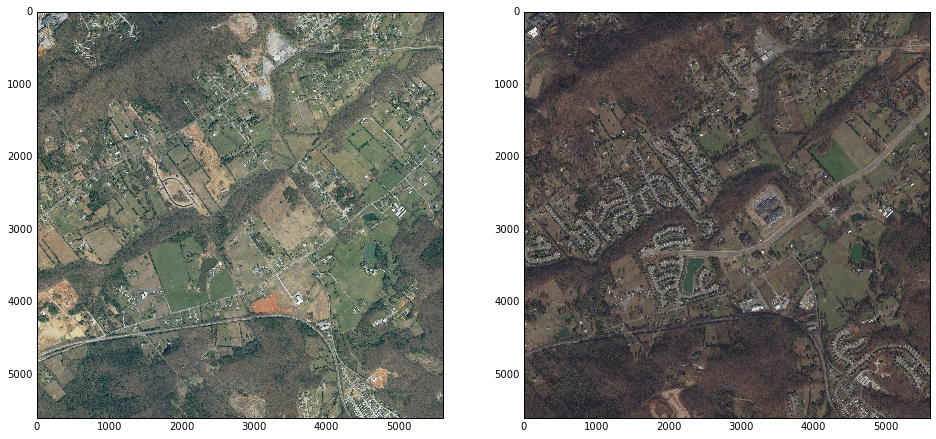

In [2]:
# show data
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(16,35))
plt.subplot(121).imshow(img1)
plt.subplot(122).imshow(img2)

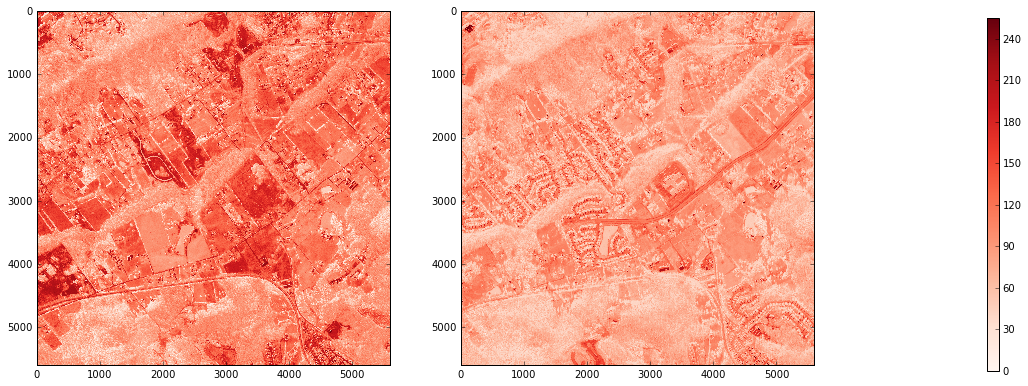

In [3]:
# show image in red color channel
fig, axes = plt.subplots(figsize=(16,35), nrows=1, ncols=2)
axes[0].imshow(img1[:,:,0], cmap=plt.cm.Reds)
im = axes[1].imshow(img2[:,:,0], cmap=plt.cm.Reds)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.95, 0.44, 0.01, 0.14])
fig.colorbar(im, cax=cbar_ax)

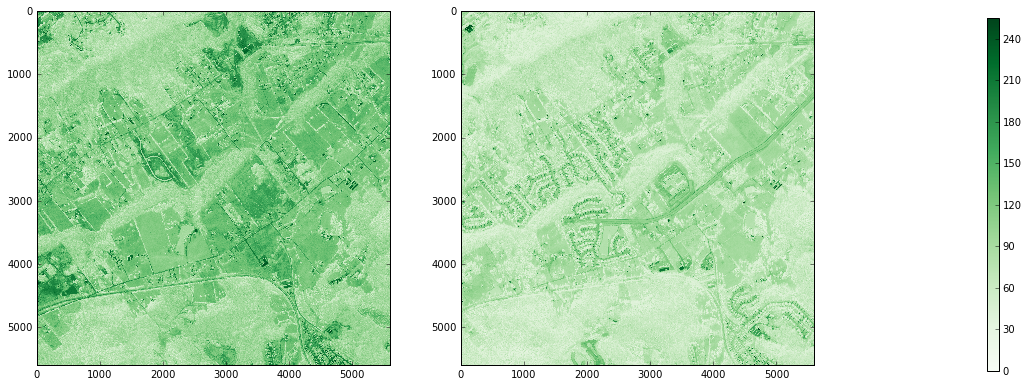

In [4]:
# show image in green color channel
fig, axes = plt.subplots(figsize=(16,35), nrows=1, ncols=2)
axes[0].imshow(img1[:,:,1], cmap=plt.cm.Greens)
im = axes[1].imshow(img2[:,:,1], cmap=plt.cm.Greens)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.95, 0.44, 0.01, 0.14])
fig.colorbar(im, cax=cbar_ax)

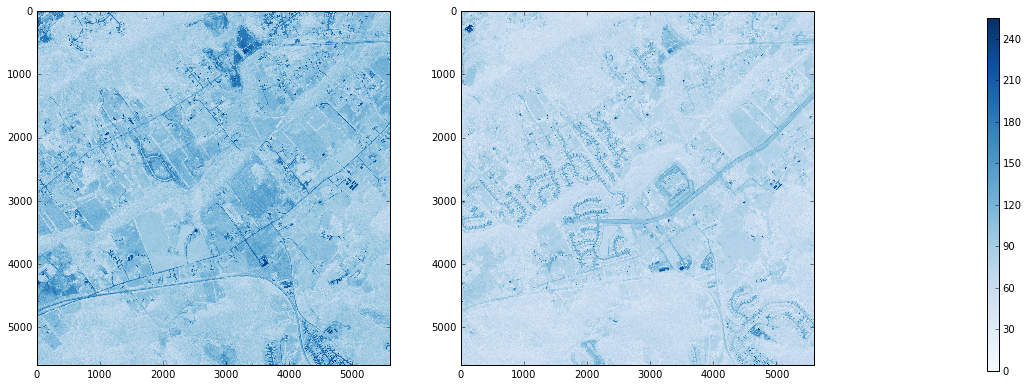

In [5]:
# show image in blue color channel
fig, axes = plt.subplots(figsize=(16,35), nrows=1, ncols=2)
axes[0].imshow(img1[:,:,2], cmap=plt.cm.Blues)
im = axes[1].imshow(img2[:,:,2], cmap=plt.cm.Blues)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.95, 0.44, 0.01, 0.14])
fig.colorbar(im, cax=cbar_ax)

In [6]:
err_state = np.seterr(divide='ignore', invalid='ignore')
# scale inside each grid and apply NDVI to extend color vector dimensions
# additional color channel = (R - G)/(R+G)
# @param: 2D RGB image as ndarray
# @param: gamma to adjust brightnesss
# @return: image with RGB and NDVI channels
def apply_ndvi(image, gamma=1.0):
    nrows, ncols, ndims = image.shape[0], image.shape[1], image.shape[2]
    apr = 1e-10 # in case divied by zero
    image_new = np.ndarray(shape=(nrows, ncols, ndims+1), dtype=float)
    image_new[:,:,0:3] = image[:,:,0:3]
    image_new[:,:,0:3] = np.clip(gamma*image_new[:,:,0:3], 0, 255) # upper limit value for RGB color
    image_new[:,:,3] = np.divide((image_new[:,:,0] - image_new[:,:,1]), (image_new[:,:,0] + image_new[:,:,1])) # (R-G)/(R+G)
    return image_new

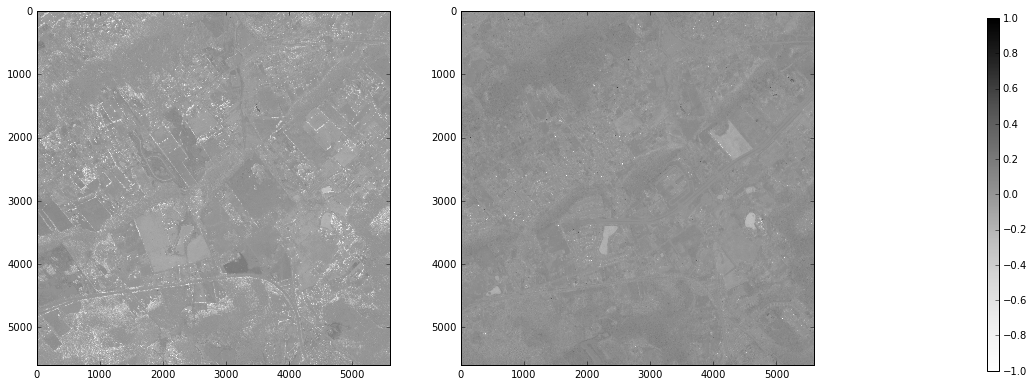

In [7]:
# apply NVDI and plot the additional dimension
img1 = apply_ndvi(img1)
img2 = apply_ndvi(img2, gamma=1.5)
fig, axes = plt.subplots(figsize=(16,35), nrows=1, ncols=2)
axes[0].imshow(img1[:,:,3], cmap=plt.cm.Greys)
im = axes[1].imshow(img2[:,:,3], cmap=plt.cm.Greys)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.95, 0.44, 0.01, 0.14])
fig.colorbar(im, cax=cbar_ax)

In [8]:
# divide image arrays into grids based on preset step size and scale RGB inside each grid
# @param: 2D RGB image as ndarray
# @param: grid_step_size should be divisible to image size
# @return: list of lists of divided ndarray (image grids)
def divide_image_into_grids_scaled(image, grid_step_size=50):
    assert image.shape[0]%grid_step==0
    assert image.shape[1]%grid_step==0
    image_grids = list()
    grid_rows = image.shape[0]/grid_step # number of grids along rows
    grid_cols = image.shape[1]/grid_step # number of grids along columns
    apr = 1e-10 # in case of zero division
    for r in range(grid_rows):
        row_image_grids = list()
        for c in range(grid_cols):
            tmp = image[r*grid_step:(r+1)*grid_step-1, c*grid_step:(c+1)*grid_step-1, :]
            minC, maxC = np.min(tmp[:,:,:3]), np.max(tmp[:,:,:3])
            for d in range(3):
                tmp[:,:,d] = np.divide((tmp[:,:,d] - minC), (maxC - minC))
            row_image_grids.append(tmp)
        image_grids.append(row_image_grids)
    return image_grids

In [9]:
# paraemeter setting to divide image into square grids
grid_step = 280 # unit in pixel, should be divisible to the image size
image_grids_1 = divide_image_into_grids_scaled(img1, grid_step)
image_grids_2 = divide_image_into_grids_scaled(img2, grid_step)

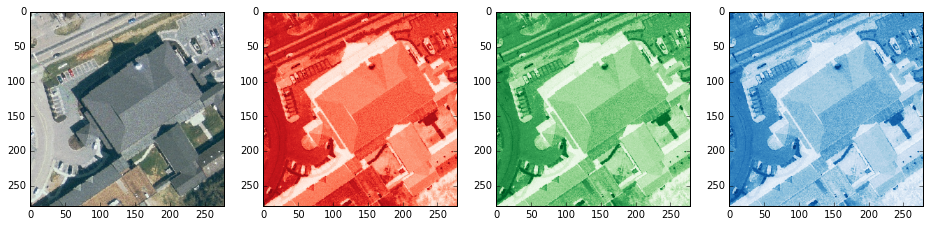

In [10]:
# plot example grids in RGB channels in image1
fig = plt.figure(figsize=(16,20))
plt.subplot(141).imshow(image_grids_1[0][0][:,:,:3])
plt.subplot(142).imshow(image_grids_1[0][0][:,:,0], cmap=plt.cm.Reds)
plt.subplot(143).imshow(image_grids_1[0][0][:,:,1], cmap=plt.cm.Greens)
plt.subplot(144).imshow(image_grids_1[0][0][:,:,2], cmap=plt.cm.Blues)

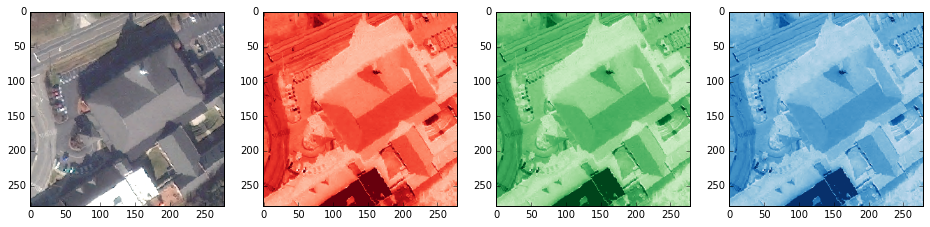

In [11]:
# plot example grids in RGB channels in image2
fig = plt.figure(figsize=(16,20))
plt.subplot(141).imshow(image_grids_2[0][0][:,:,:3])
plt.subplot(142).imshow(image_grids_2[0][0][:,:,0], cmap=plt.cm.Reds)
plt.subplot(143).imshow(image_grids_2[0][0][:,:,1], cmap=plt.cm.Greens)
plt.subplot(144).imshow(image_grids_2[0][0][:,:,2], cmap=plt.cm.Blues)

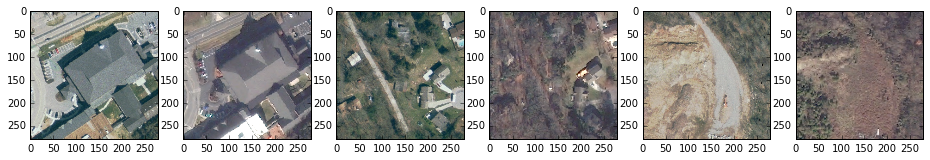

In [12]:
# plot example grids
fig = plt.figure(figsize=(16,50))
plt.subplot(161).imshow(image_grids_1[0][0][:,:,:3])
plt.subplot(162).imshow(image_grids_2[0][0][:,:,:3])
plt.subplot(163).imshow(image_grids_1[0][2][:,:,:3])
plt.subplot(164).imshow(image_grids_2[0][2][:,:,:3])
plt.subplot(165).imshow(image_grids_1[0][10][:,:,:3])
plt.subplot(166).imshow(image_grids_2[0][10][:,:,:3])

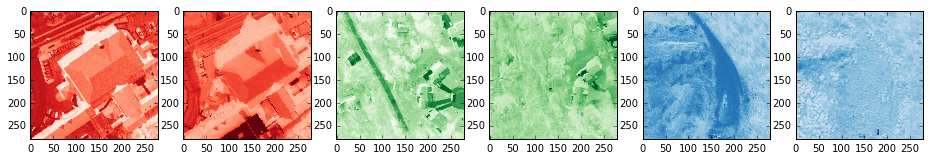

In [13]:
# plot single color channel
fig = plt.figure(figsize=(16,50))
plt.subplot(161).imshow(image_grids_1[0][0][:,:,0], cmap=plt.cm.Reds) # R
plt.subplot(162).imshow(image_grids_2[0][0][:,:,0], cmap=plt.cm.Reds)
plt.subplot(163).imshow(image_grids_1[0][2][:,:,1], cmap=plt.cm.Greens) # G
plt.subplot(164).imshow(image_grids_2[0][2][:,:,1], cmap=plt.cm.Greens)
plt.subplot(165).imshow(image_grids_1[0][10][:,:,2], cmap=plt.cm.Blues) # B
plt.subplot(166).imshow(image_grids_2[0][10][:,:,2], cmap=plt.cm.Blues)